# Intro: Getting used to Statsbomb Free Data

In [1]:
import pandas as pd
import numpy as np
import os 
from statsbombpy import sb
from mplsoccer.pitch import Pitch
import warnings; warnings.filterwarnings("ignore", category=FutureWarning)

# Competitions

In [2]:
path = '/Users/weiyiwang/code/TheWangAndOnly/football/open-data/data/competitions.json'
competitions = pd.read_json(path)

In [3]:
competitions.columns

Index(['competition_id', 'season_id', 'country_name', 'competition_name',
       'competition_gender', 'competition_youth', 'competition_international',
       'season_name', 'match_updated', 'match_updated_360',
       'match_available_360', 'match_available'],
      dtype='object')

In [4]:
competitions['competition_name'].unique()

array(['Champions League', "FA Women's Super League", 'FIFA World Cup',
       'La Liga', 'NWSL', 'Premier League', 'UEFA Euro',
       "Women's World Cup"], dtype=object)

## For this case, I will use the UEFA 2020 Euro

In [5]:
competitions.head(len(competitions))

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2021-06-22T21:17:46.381,2021-06-13T16:17:31.694,None,2021-06-22T21:17:46.381
9,16,21,Europe,Champions League,male,False,False,2009/2010,2021-06-22T21:24:20.506,2021-06-13T16:17:31.694,None,2021-06-22T21:24:20.506


__UEFA EURO 2020: competition_id is 55 and season_id is 43__

# EURO 2020 Matches

In [6]:
euro_matches = sb.matches(competition_id = 55, season_id = 43)

credentials were not supplied. open data access only


In [7]:
euro_matches.head(len(euro_matches))

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,3788753,2021-06-16,15:00:00.000,Europe - UEFA Euro,2020,Finland,Russia,0,1,available,available,2021-11-11T14:00:16.105809,2021-09-22T16:39:05.697512,2,Group Stage,Saint-Petersburg Stadium,Danny Desmond Makkelie,1.1.0,2,2
1,3788765,2021-06-20,18:00:00.000,Europe - UEFA Euro,2020,Switzerland,Turkey,3,1,available,available,2021-08-02T14:58:49.057,2021-11-11T13:54:37.507376,3,Group Stage,Bakı Olimpiya Stadionu,Slavko Vinčić,1.1.0,2,2
2,3795107,2021-07-02,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Italy,1,2,available,available,2021-07-19T12:41:55.898,2021-09-23T00:02:51.495862,5,Quarter-finals,Allianz Arena (München),Slavko Vinčić,1.1.0,2,2
3,3795221,2021-07-07,21:00:00.000,Europe - UEFA Euro,2020,England,Denmark,2,1,available,available,2021-07-09T12:38:23.437,2021-09-22T22:33:37.494366,6,Semi-finals,Wembley Stadium (London),Danny Desmond Makkelie,1.1.0,2,2
4,3795506,2021-07-11,21:00:00.000,Europe - UEFA Euro,2020,Italy,England,1,1,available,available,2021-07-12T12:27:50.647,2021-09-22T22:40:31.690550,7,Final,Wembley Stadium (London),Björn Kuipers,1.1.0,2,2
5,3794688,2021-06-29,18:00:00.000,Europe - UEFA Euro,2020,England,Germany,2,0,available,available,2021-08-21T19:00:29.036,2021-09-22T23:46:25.457149,4,Round of 16,Wembley Stadium (London),Danny Desmond Makkelie,1.1.0,2,2
6,3794692,2021-06-29,21:00:00.000,Europe - UEFA Euro,2020,Sweden,Ukraine,1,2,available,available,2021-10-09T14:22:25.560075,2021-09-22T23:38:19.483199,4,Round of 16,Hampden Park,Daniele Orsato,1.1.0,2,2
7,3794686,2021-06-28,18:00:00.000,Europe - UEFA Euro,2020,Croatia,Spain,3,5,available,available,2021-06-29T12:51:11.507,2021-09-22T23:30:10.428563,4,Round of 16,Nya Parken,Cüneyt Çakιr,1.1.0,2,2
8,3794687,2021-06-27,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Portugal,1,0,available,available,2021-07-05T13:37:21.633,2021-09-22T16:40:48.020474,4,Round of 16,Estadio Olímpico de Sevilla (Sevilla),Felix Brych,1.1.0,2,2
9,3794685,2021-06-26,21:00:00.000,Europe - UEFA Euro,2020,Italy,Austria,2,1,available,available,2021-06-27T13:56:22.030,2021-09-22T16:40:41.310001,4,Round of 16,Wembley Stadium (London),Anthony Taylor,1.1.0,2,2


## Belgium matches

In [8]:
belgium_matches = euro_matches[(euro_matches['home_team'] == 'Belgium') | (euro_matches['away_team'] == 'Belgium')]

In [9]:
belgium_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
2,3795107,2021-07-02,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Italy,1,2,available,available,2021-07-19T12:41:55.898,2021-09-23T00:02:51.495862,5,Quarter-finals,Allianz Arena (München),Slavko Vinčić,1.1.0,2,2
8,3794687,2021-06-27,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Portugal,1,0,available,available,2021-07-05T13:37:21.633,2021-09-22T16:40:48.020474,4,Round of 16,Estadio Olímpico de Sevilla (Sevilla),Felix Brych,1.1.0,2,2
13,3788768,2021-06-21,21:00:00.000,Europe - UEFA Euro,2020,Finland,Belgium,0,2,available,available,2021-06-22T13:47:34.925,2021-09-22T16:40:14.297313,3,Group Stage,Saint-Petersburg Stadium,Felix Brych,1.1.0,2,2
18,3788757,2021-06-17,18:00:00.000,Europe - UEFA Euro,2020,Denmark,Belgium,1,2,available,available,2021-07-24T16:17:22.251,2021-09-22T16:39:19.238605,2,Group Stage,Nya Parken,Björn Kuipers,1.1.0,2,2
49,3788743,2021-06-12,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Russia,3,0,available,available,2021-06-13T13:10:11.602,2021-09-22T16:38:15.368959,1,Group Stage,Saint-Petersburg Stadium,Antonio Miguel Mateu Lahoz,1.1.0,2,2


### 1st Game against Russia

In [10]:
game_1 = sb.events(match_id = 3788743)

credentials were not supplied. open data access only


In [11]:
game_1 = game_1[game_1['team'] == 'Belgium']

Trying to focus on passes

In [12]:
game_1.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_type',
       'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_no_touch', 'pass_outco

In [13]:
game_1.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_type',
       'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_no_touch', 'pass_outco

In [14]:
game_1['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Duel', 'Clearance', 'Pressure', 'Ball Recovery',
       'Injury Stoppage', 'Referee Ball-Drop', 'Block', 'Miscontrol',
       'Interception', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Dribbled Past', 'Dribble', 'Dispossessed',
       'Substitution', 'Half End', 'Tactical Shift', 'Shield'],
      dtype=object)

#### Passes

In [15]:
#passes = game_1[game_1['type' == 'Pass']]
passes = game_1[['type','player', 'pass_recipient', 'location', 'pass_end_location']]

In [16]:
passes = passes[passes['type'] == 'Pass']

In [17]:
passes

,type,player,pass_recipient,location,pass_end_location
11,Pass,Leander Dendoncker,NaN,"[11.5, 28.9]","[45.6, 34.7]"
14,Pass,Thibaut Courtois,Jan Vertonghen,"[8.5, 37.3]","[19.1, 24.7]"
15,Pass,Jan Vertonghen,Thorgan Hazard,"[19.8, 13.3]","[36.3, 3.0]"
16,Pass,Thorgan Hazard,Jan Vertonghen,"[49.1, 4.0]","[40.4, 7.1]"
17,Pass,Jan Vertonghen,Anga Dedryck Boyata,"[40.4, 7.1]","[35.7, 19.6]"
...,...,...,...,...,...
1165,Pass,Toby Alderweireld,Anga Dedryck Boyata,"[58.9, 77.2]","[43.0, 73.1]"
1166,Pass,Anga Dedryck Boyata,Thomas Vermaelen,"[36.4, 72.5]","[35.3, 47.2]"
1167,Pass,Thomas Vermaelen,Youri Tielemans,"[36.0, 46.8]","[48.8, 48.7]"
1168,Pass,Youri Tielemans,Toby Alderweireld,"[51.4, 47.7]","[50.5, 73.3]"


__Youri Tielemans__

In [18]:
Youri = passes[passes['player'] == 'Youri Tielemans']

Now at an impass because location and pass_end_location are str but lists too.

In [20]:
Youri['location'].iloc[:]

22      [62.0, 21.6]
48      [34.1, 11.4]
52      [62.7, 45.3]
74      [76.0, 30.8]
76      [80.2, 25.0]
            ...     
1059    [46.9, 19.8]
1126    [57.6, 37.6]
1157    [32.8, 52.6]
1160    [36.2, 34.0]
1168    [51.4, 47.7]
Name: location, Length: 92, dtype: object

In [30]:
Youri['startX'] = [i[0] for i in Youri['location'].values]

<ipython-input-30-8ce4017dede6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Youri['startX'] = [i[0] for i in Youri['location'].values]


In [31]:
Youri['startY'] = [i[1] for i in Youri['location'].values]

<ipython-input-31-686ede638f3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Youri['startY'] = [i[1] for i in Youri['location'].values]


In [32]:
Youri['endX'] = [i[0] for i in Youri['pass_end_location']]
Youri['endY'] = [i[1] for i in Youri['pass_end_location']]

<ipython-input-32-6233963c4ad7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Youri['endX'] = [i[0] for i in Youri['pass_end_location']]
<ipython-input-32-6233963c4ad7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Youri['endY'] = [i[1] for i in Youri['pass_end_location']]


In [33]:
pitch = Pitch()

In [34]:
Youri

,type,player,pass_recipient,location,pass_end_location,startX,startY,endX,endY
22,Pass,Youri Tielemans,Yannick Ferreira Carrasco,"[62.0, 21.6]","[71.9, 0.1]",62.0,21.6,71.9,0.1
48,Pass,Youri Tielemans,Thorgan Hazard,"[34.1, 11.4]","[33.6, 3.5]",34.1,11.4,33.6,3.5
52,Pass,Youri Tielemans,Timothy Castagne,"[62.7, 45.3]","[120.0, 70.7]",62.7,45.3,120.0,70.7
74,Pass,Youri Tielemans,Thorgan Hazard,"[76.0, 30.8]","[89.1, 24.3]",76.0,30.8,89.1,24.3
76,Pass,Youri Tielemans,Yannick Ferreira Carrasco,"[80.2, 25.0]","[90.9, 4.0]",80.2,25.0,90.9,4.0
...,...,...,...,...,...,...,...,...,...
1059,Pass,Youri Tielemans,Eden Hazard,"[46.9, 19.8]","[54.8, 20.9]",46.9,19.8,54.8,20.9
1126,Pass,Youri Tielemans,Thomas Vermaelen,"[57.6, 37.6]","[54.6, 22.6]",57.6,37.6,54.6,22.6
1157,Pass,Youri Tielemans,Thomas Vermaelen,"[32.8, 52.6]","[32.8, 32.3]",32.8,52.6,32.8,32.3
1160,Pass,Youri Tielemans,Toby Alderweireld,"[36.2, 34.0]","[42.8, 63.7]",36.2,34.0,42.8,63.7


In [ ]:
import m

NameError: name 'plt' is not defined

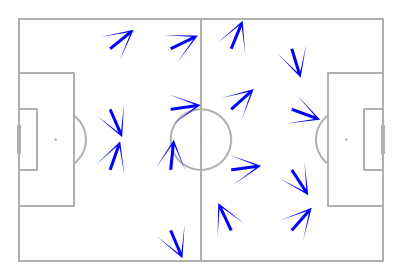

In [37]:
fig, ax = pitch.draw()
fm = pitch.flow(Youri.startX, Youri.startY, Youri.endX, Youri.endY, color='blue', arrow_type='same',
                arrow_length=10, bins=(6, 4), headwidth=10, headlength=10,
                headaxislength=2, ax=ax)
plt.title('Youri Tielemans pass directions against Russia')

In [27]:
Youri.dtypes

type                  object
player                object
pass_recipient        object
location              object
pass_end_location     object
startX               float64
startY               float64
endX                 float64
endY                 float64
dtype: object